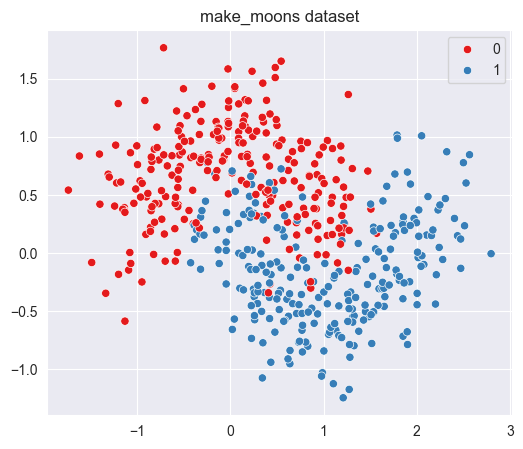

Cross-val scores: [0.9125 0.875  0.9125 0.9125 0.9   ]
Mean: 0.9025000000000001 ± 0.014577379737113242
Test accuracy: 0.92


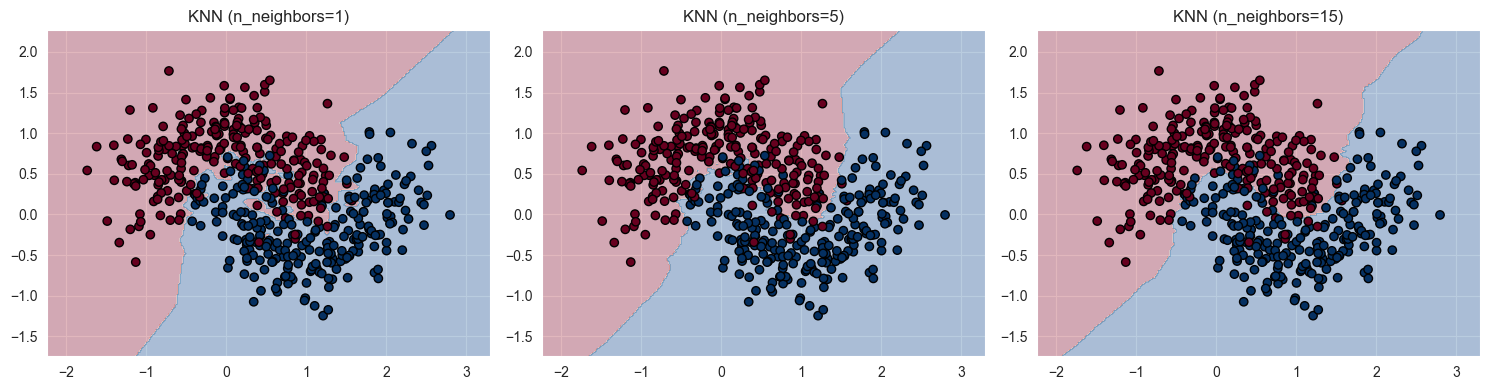

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

#1. Dane

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette="Set1")
plt.title("make_moons dataset")
plt.show()

#2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

#3. Model KNN ze skalowaniem
model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))

#4. Cross-validation (na zbiorze treningowym)
cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=cv)

print("Cross-val scores:", scores)
print("Mean:", scores.mean(), "±", scores.std())

#5. Test finalny na zbiorze testowym
model.fit(X_train, y_train)
print("Test accuracy:", model.score(X_test, y_test))

#--- Granice decyzyjne - wizualizacja

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

# Dane
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

# Funkcja do rysowania granic
def plot_decision_boundary(model, X, y, ax, title):
    # zakresy osi
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    # przewidywanie klas w siatce
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # tło z granicami
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
    # punkty danych
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolor="k")
    ax.set_title(title)

# Rysowanie dla różnych n_neighbors
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, n in zip(axes, [1, 5, 15]):
    model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=n))
    model.fit(X, y)
    plot_decision_boundary(model, X, y, ax, f"KNN (n_neighbors={n})")

plt.tight_layout()
plt.show()
